In [1]:
%matplotlib notebook
from pylab import *

In [2]:
import lmfit as lm
from lmfit import (Model,                  # create a model from a python function
                   models,                 # models for the most common functions 
                   conf_interval,          # robust confidence interval calculation 
                   report_fit, report_ci)  # pretty-print report fit summaries

/Users/anto/anaconda/envs/py3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Simulate some data

In [3]:
real_mean = 1
real_sigma = 1
num_points = 1000

data = real_sigma * randn(num_points) + real_mean

<IPython.core.display.Javascript object>


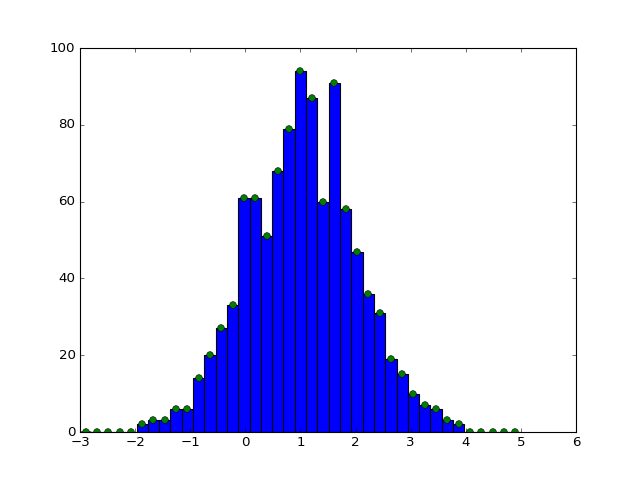

In [4]:
bins = linspace(-3, 5, 40)
counts, _ = histogram(data, bins)
x = bins[:-1] + 0.5*(bins[1] - bins[0])
y = counts
hist(data, bins)
plot(x, y, 'o');

### Intent and caveat

We are going to fit a Gaussian to $(x, y)$ values using "curve-fit", i.e. least-square minimization of the difference `model - data`. This is OK to first order approximation and for the purpose of this example. However this assumes:

$$ y = f(x) + \epsilon$$

where $f(x)$ is a deterministic model and  $\epsilon$ is a normal random variable.

In this simulation, however, the $y$ values are "counts" of an histogram, the distribution of each of this counts is  a Poisson random variable (not a Gaussian). So the initial assumption does not strictly hold. This is a very simple model and the fit will be good anyway, but in other cases (i.e. exponential fit) the difference may be important.

## Define the model
LMFit documentation:

- [Modeling Data and Curve Fitting](http://cars9.uchicago.edu/software/python/lmfit/model.html)

In [5]:
def gauss(x, mean=0, sigma=1, ampl=1):
    return ampl * exp((-(x - mean)**2) / (2 * sigma**2))

In [6]:
model = lm.Model(gauss)

**Note:**

- `Model` uses default values as initial values for fitting

In [7]:
model

<lmfit.Model: Model(gauss)>

In [8]:
model.param_names

{'ampl', 'mean', 'sigma'}

Model parameters can have constrains (i.e. boundaries: `min` and/or `max`):

In [9]:
model.set_param_hint('sigma', min=0)

## Fitting model to data

In [10]:
fit_res = model.fit(y, x=x)

In [11]:
lm.report_fit(fit_res)

[[Fit Statistics]]
    # function evals   = 98
    # data points      = 39
    # variables        = 3
    chi-square         = 1487.253
    reduced chi-square = 41.313
[[Variables]]
    ampl:    83.2961638 +/- 2.703443 (3.25%) (init= 1)
    sigma:   0.98127344 +/- 0.036774 (3.75%) (init= 1)
    mean:    1.03891431 +/- 0.036774 (3.54%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(ampl, sigma)               = -0.577 


In [15]:
# TODO make plot, see LMFit docs for examples

## Robust confidence intervals

> The lmfit confidence module allows you to explicitly calculate confidence intervals for variable parameters. For most models, it is not necessary: the estimation of the standard error from the estimated covariance matrix is normally quite good.

> But for some models, e.g. a sum of two exponentials, the approximation begins to fail. For this case, lmfit has the function conf_interval() to calculate confidence intervals directly. This is substantially slower than using the errors estimated from the covariance matrix, but the results are more robust.

*From [Calculation of confidence intervals](http://cars9.uchicago.edu/software/python/lmfit/confidence.html)*
*in LmFit Documentation.*

In [13]:
ci = lm.conf_interval(fit_res)

In [14]:
lm.report_ci(ci)

         99.70%    95.00%    67.40%     0.00%    67.40%    95.00%    99.70%
 ampl  74.82515  77.86784  80.61504  83.29616  86.00652  88.84886  92.06541
sigma   0.87021   0.90911   0.94518   1.00297   1.01874   1.05916   1.10648
 mean   0.92113   0.96411   1.00224   1.03834   1.07554   1.11356   1.15621
